In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import os

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [31]:
data_path = r"C:\Users\nabon\OneDrive\Desktop\Cow breed classification\Cattle Breeds"
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80% train, 20% validation


In [32]:
train_set = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=15,
    class_mode='categorical',
    subset='training'
)

Found 969 images belonging to 5 classes.


In [33]:
datagen = ImageDataGenerator(
    rescale=1./255,           
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=True,     
    validation_split=0.2      
)

In [34]:
val_set = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 239 images belonging to 5 classes.


In [35]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # Layer 1
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),  # Layer 2
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),  # Layer 3
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_set.num_classes, activation='softmax')  # Output layer
])

C:\Users\nabon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,997 (18.42 MB)

 Trainable params: 4,828,997 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=20,         
    steps_per_epoch=len(train_set),
    validation_steps=len(val_set)
)

C:\Users\nabon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.2293 - loss: 1.7989

C:\Users\nabon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 273ms/step - accuracy: 0.2755 - loss: 1.6463 - val_accuracy: 0.3682 - val_loss: 1.4230
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - accuracy: 0.4025 - loss: 1.3901 - val_accuracy: 0.4310 - val_loss: 1.3412
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 243ms/step - accuracy: 0.4561 - loss: 1.3103 - val_accuracy: 0.4477 - val_loss: 1.3071
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - accuracy: 0.5119 - loss: 1.1864 - val_accuracy: 0.5314 - val_loss: 1.2760
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.6027 - loss: 1.0135 - val_accuracy: 0.5146 - val_loss: 1.1756
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 246ms/step - accuracy: 0.6956 - loss: 0.8000 - val_accuracy: 0.4979 - val_loss: 1.2956
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.7792 - loss: 0.6395 - val_accuracy: 0.5272 - val_loss: 1.5057
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step - accuracy: 0.8019 - loss: 0.5393 - val_accuracy: 0.4728 - val

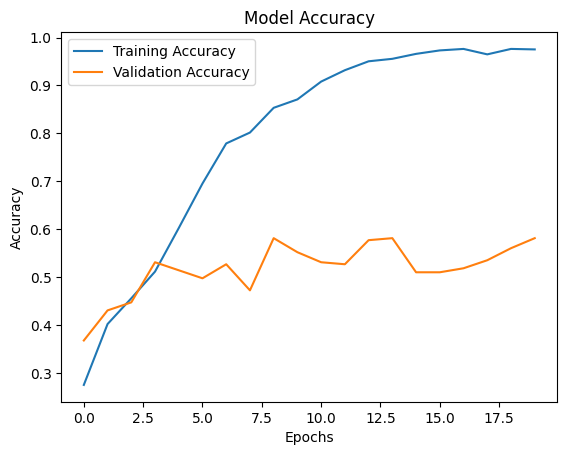

In [39]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

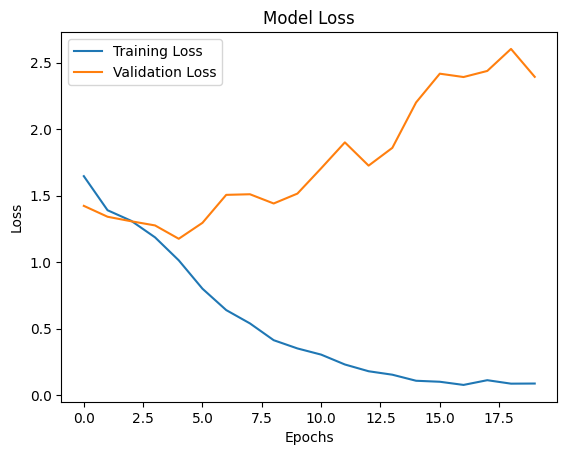

In [40]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

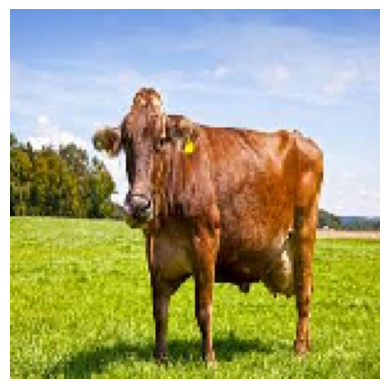

In [41]:
from tensorflow.keras.preprocessing import image
img_path = r"C:\Users\nabon\Downloads\cow.jpeg"
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

In [42]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [43]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
breed_labels = list(train_set.class_indices.keys())

print(" Predicted Breed:", breed_labels[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
 Predicted Breed: Brown Swiss cattle


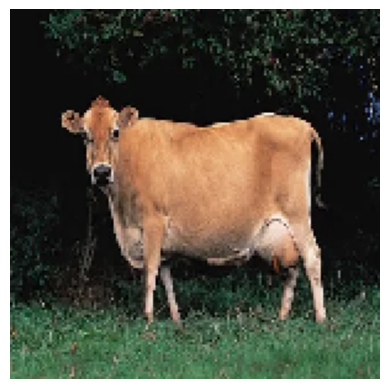

In [44]:
from tensorflow.keras.preprocessing import image
img_path = r"C:\Users\nabon\Downloads\jerseycow.webp"
img = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img)
plt.axis('off')
plt.show()

In [45]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [47]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
breed_labels = list(train_set.class_indices.keys())

print(" Predicted Breed:", breed_labels[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
 Predicted Breed: Red Dane cattle


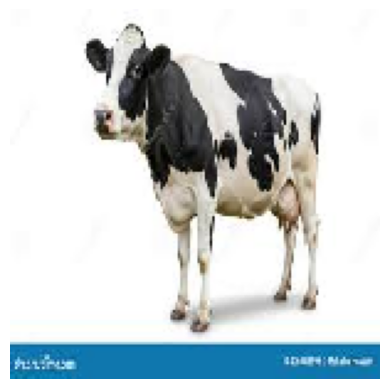

In [48]:
from tensorflow.keras.preprocessing import image
img_path = r"C:\Users\nabon\Downloads\holstein cow.jpeg"
img = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img)
plt.axis('off')
plt.show()

In [49]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [50]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
breed_labels = list(train_set.class_indices.keys())

print(" Predicted Breed:", breed_labels[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
 Predicted Breed: Holstein Friesian cattle
